In [1]:
from numpy import array
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import   LSTM
from keras.preprocessing.sequence import TimeseriesGenerator
import copy
from statsmodels.tsa.stattools import pacf
import matplotlib.pyplot as plt
from sklearn import preprocessing

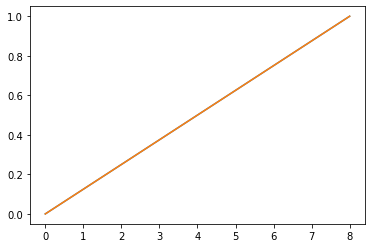

In [19]:
aa=[1,2,3,4,5,6,7,8,9,1,2,3,4,5,6,7,8,9,1,2,3,4,5,6,7,8,9,1,2,3,4,5,6,7,8,9,1,2,3,4,5,6,7,8,9,1,2,3,4,5,6,7,8,9,1,2,3,4,5,6,7,8,9,1,2,3,4,5,6,7,8,9]
aaa=copy.deepcopy(aa)
xmin = min(aa) 
xmax=max(aa)
for i, x in enumerate(aaa):
    aaa[i] = (x-xmin) / (xmax-xmin)

series = array(aaa)
n_features = 1
series = series.reshape((len(series), n_features))

n_input =9
endd=len(aaa)-1
plt.plot(aaa[0:n_input])
# bb=aaa[endd-n_input:endd]
bb=aaa[0:n_input]
len(bb)
plt.plot(bb)

In [28]:
# define generator
generator = TimeseriesGenerator(series, series, length=n_input, batch_size=1)
# define model
model = Sequential()
model.add(LSTM(units =256, activation = 'tanh', recurrent_activation ='hard_sigmoid', input_shape=(n_input, n_features)))
model.add(Dense (units =1, activation = 'linear'))
model.compile ( loss ='mean_squared_error',optimizer = 'rmsprop')
# fit model
model.fit(generator, steps_per_epoch=1, epochs=700, verbose=1,shuffle = True)

Epoch 1/10000


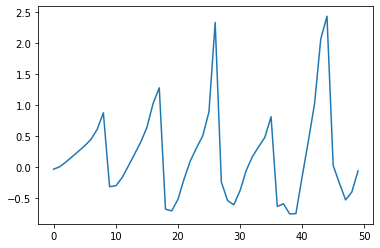

In [27]:
origin_input=copy.deepcopy(bb)
ans=[]
for i in range(0,50):
    now_input=array(origin_input).reshape((1, n_input, n_features))
    yhat = model.predict(now_input, verbose=0)
    # print(i,yhat[0][0])
    ans.append(yhat[0][0])
    origin_input.remove(origin_input[0])
    origin_input.append(yhat[0][0])
plt.plot(ans)